In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file with specified headers
file_path = "order_processing_times.csv"
data = pd.read_csv(file_path, names=["Type", "Latency(ns)"])

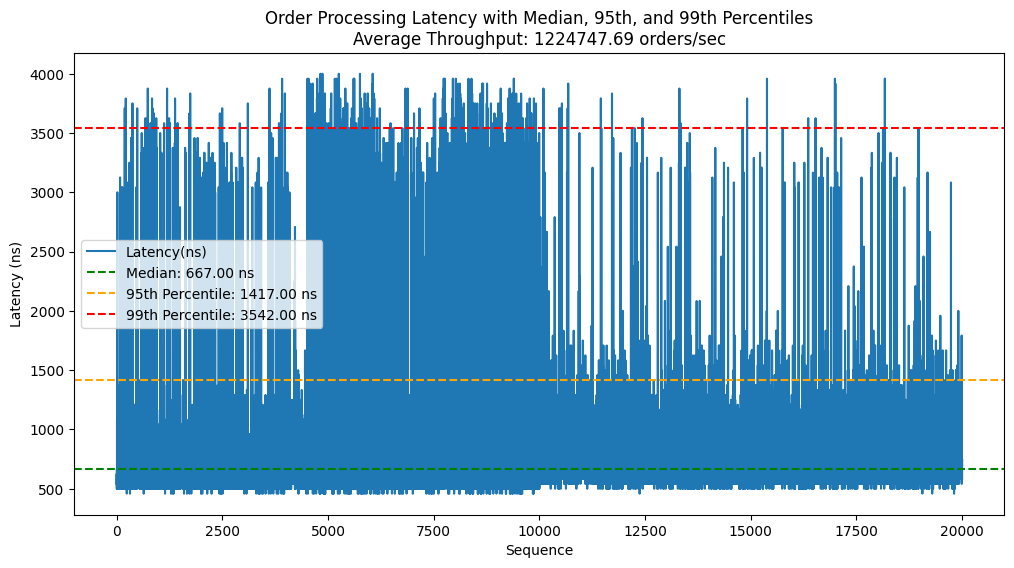

In [3]:
# Filter out data where Latency(ns) > 4000
filtered_data = data[data["Latency(ns)"] <= 4000]

subset1 = filtered_data.iloc[20000:30000]
subset2 = filtered_data.iloc[-10000:]

combined_data = pd.concat([subset1, subset2]).reset_index(drop=True)

# Calculate statistics
median_latency = combined_data["Latency(ns)"].median()
percentile_95 = combined_data["Latency(ns)"].quantile(0.95)
percentile_99 = combined_data["Latency(ns)"].quantile(0.99)
# Calculate the average throughput
# Convert latency from nanoseconds to seconds and calculate throughput (orders per second)
average_latency_ns = combined_data["Latency(ns)"].mean()
average_throughput = 1 / (average_latency_ns * 1e-9)  # Convert ns to seconds and calculate throughput

# Plot the latency in sequence
plt.figure(figsize=(12, 6))
plt.plot(combined_data["Latency(ns)"], linestyle='-', label="Latency(ns)")

# Add horizontal lines for median, 95th percentile, and 99th percentile
plt.axhline(median_latency, color='green', linestyle='--', label=f"Median: {median_latency:.2f} ns")
plt.axhline(percentile_95, color='orange', linestyle='--', label=f"95th Percentile: {percentile_95:.2f} ns")
plt.axhline(percentile_99, color='red', linestyle='--', label=f"99th Percentile: {percentile_99:.2f} ns")

# Add labels and title
plt.xlabel("Sequence")
plt.ylabel("Latency (ns)")
plt.title(f"Order Processing Latency with Median, 95th, and 99th Percentiles\nAverage Throughput: {average_throughput:.2f} orders/sec")
plt.legend()

# Show the plot
plt.show()

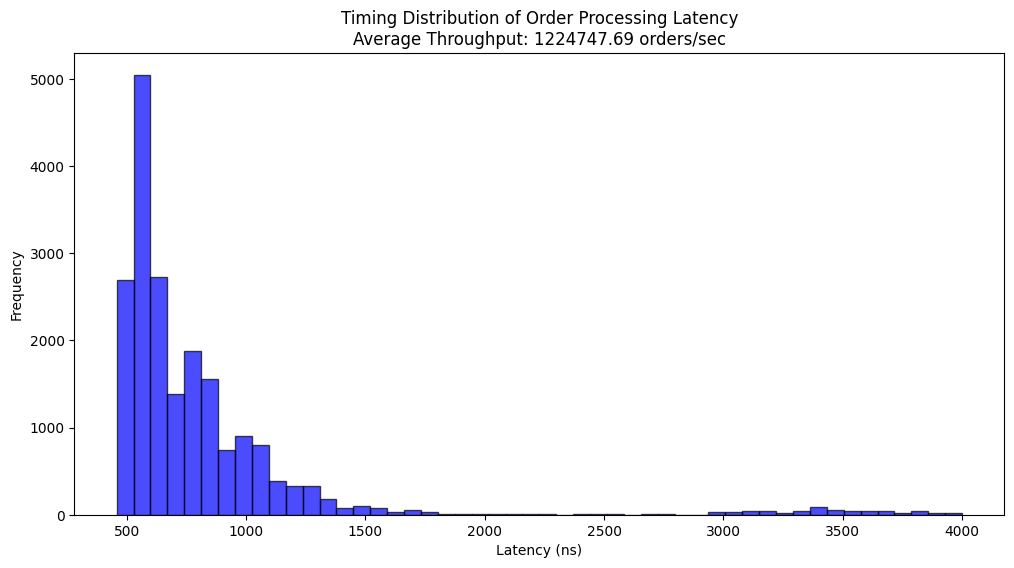

In [4]:
# Calculate the average throughput
# Convert latency from nanoseconds to seconds and calculate throughput (orders per second)
average_latency_ns = combined_data["Latency(ns)"].mean()
average_throughput = 1 / (average_latency_ns * 1e-9)  # Convert ns to seconds and calculate throughput

# Plot the histogram for timing distribution
plt.figure(figsize=(12, 6))
plt.hist(combined_data["Latency(ns)"], bins=50, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Latency (ns)")
plt.ylabel("Frequency")
plt.title(f"Timing Distribution of Order Processing Latency\nAverage Throughput: {average_throughput:.2f} orders/sec")

# Show the plot
plt.show()